Location (row, col): 400 300
White pixel: [248 248 222]
Coef :  [1.02822581 1.02822581 1.14864865]


(<Axes: >, <matplotlib.image.AxesImage at 0x329e7c910>)

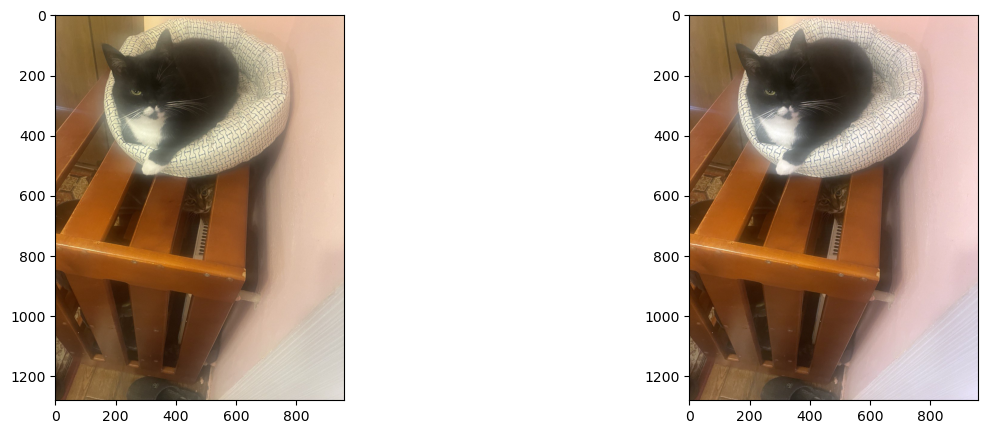

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

img = cv2.cvtColor(cv2.imread('cats.jpg'), cv2.COLOR_BGR2RGB)

# have no any affect because its make coeffs almost = 1
# def mostWhitePixel(img):
#     white_ref = np.array([255, 255, 255])
#     # Compute squared distance from white for each pixel
#     dist = np.sum((img - white_ref) ** 2, axis=2)

#     # Find location of pixel closest to white
#     min_idx = np.unravel_index(np.argmin(dist), dist.shape)
#     row, col = min_idx
#     most_white_pixel = img[row, col]
#     return [row, col]


# row, col = mostWhitePixel(img)
row, col = 400, 300
print("Location (row, col):", row, col)

white = img[row, col, :]
print("White pixel:", white)

coeffs = 255.0/white
print("Coef : ", coeffs)

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

(150.96640380859375, 120.54956461588543, 91.94233398437501, 0.0)
Avarage gray coeff  121.15276746961807
Coeff Kr 0.8025147609876461
Coeff Kb 1.317703850004582
Coeff Kg 1.005003774635393


(<Axes: title={'center': 'Gray World Balanced'}>,
 Text(0.5, 1.0, 'Gray World Balanced'))

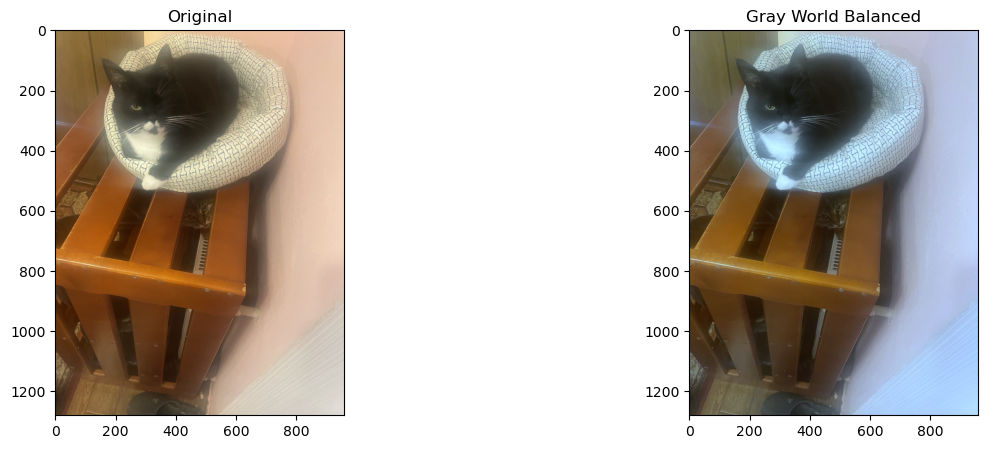

In [82]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

img = cv2.cvtColor(cv2.imread('cats.jpg'), cv2.COLOR_BGR2RGB)
# Compute the mean values for all three colour channels (red, green, blue)
(mean_r, mean_g, mean_b, alpha) = cv2.mean(img)

mean = cv2.mean(img);
print(mean)

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

# not sure if this correct?
mean_gray = (mean_b + mean_g + mean_r) / 3
print("Avarage gray coeff ", mean_gray)

kr = mean_gray/mean_r
kg = mean_gray/mean_g
kb = mean_gray/mean_b

print("Coeff Kr", kr)
print("Coeff Kb", kb)
print("Coeff Kg", kg)

r, g, b = cv2.split(img)

# # Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[:,:,0] = r * kr
balanced[:,:,1] = g * kg
balanced[:,:,2] = b * kb

balanced = balanced/255
balanced[balanced > 1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img), plt.title("Original")
plt.subplot(122), plt.imshow(balanced), plt.title("Gray World Balanced")

(<Axes: title={'center': 'Scale by max'}>,
 Text(0.5, 1.0, 'Scale by max'))

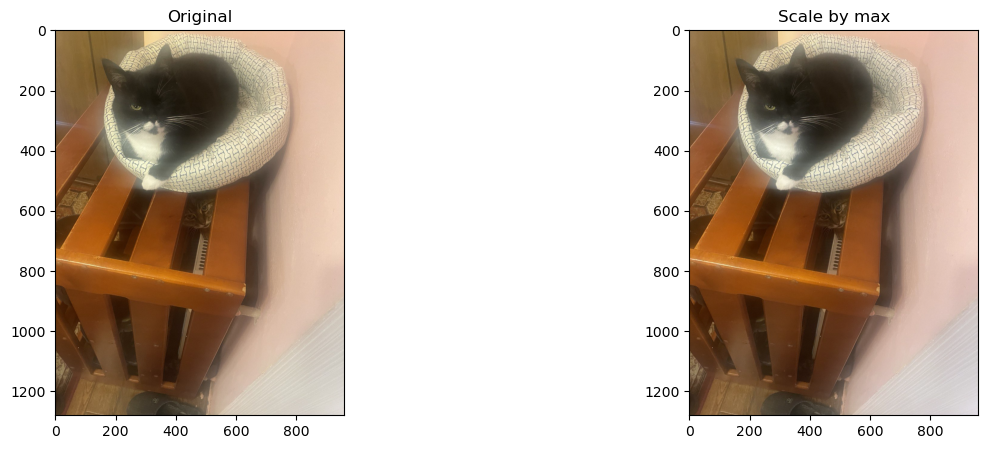

In [87]:
# Load your image
img = cv2.cvtColor(cv2.imread('cats.jpg'), cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(img)


# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(r)
max_g = np.max(g)
max_b = np.max(b)

b = b * (255.0 / max_b)
g = g * (255.0 / max_g)
r = r * (255.0 / max_r)

balanced = cv2.merge([r, g, b])
# Apply scale-by-max balancing and generate the balanced image
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img), plt.title("Original")
plt.subplot(122), plt.imshow(balanced), plt.title("Scale by max")